In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
train_data[0]  # show input's word dic

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [12]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?????') for i in train_data[0]]
)

In [13]:
decoded_review

"????? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ????? is an amazing actor and now the same being director ????? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ????? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ????? to the two little boy's that played the ????? of norman and paul they were just brilliant children are often left out of the ????? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what

In [26]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in enumerate(sequence):
            results[i, j] = 1
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [28]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [29]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [30]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 16ms/step - loss: 0.6613 - accuracy: 0.5923 - val_loss: 0.5833 - val_accuracy: 0.7878
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.5194 - accuracy: 0.7962 - val_loss: 0.4761 - val_accuracy: 0.8124
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.4117 - accuracy: 0.8650 - val_loss: 0.4874 - val_accuracy: 0.7641
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3440 - accuracy: 0.8804 - val_loss: 0.4545 - val_accuracy: 0.7832
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2841 - accuracy: 0.9036 - val_loss: 0.3226 - val_accuracy: 0.8740
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2531 - accuracy: 0.9111 - val_loss: 0.3778 - val_accuracy: 0.8436
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2271 - accuracy: 0.9192 - val_loss: 0.3044 - val_accuracy: 0.8773
Epoch 8/20
30/30 [=

In [31]:
history.history

{'loss': [0.6613011956214905,
  0.519356369972229,
  0.4116782546043396,
  0.34397271275520325,
  0.2840529680252075,
  0.2531144618988037,
  0.2271217405796051,
  0.1986498385667801,
  0.1767699420452118,
  0.15309403836727142,
  0.13089187443256378,
  0.1325283646583557,
  0.12061064690351486,
  0.09753035008907318,
  0.09307689964771271,
  0.09275877475738525,
  0.07321742177009583,
  0.06570357084274292,
  0.05788169056177139,
  0.05385870859026909],
 'accuracy': [0.5923333168029785,
  0.7961999773979187,
  0.8650000095367432,
  0.8804000020027161,
  0.9035999774932861,
  0.911133348941803,
  0.9192000031471252,
  0.9318666458129883,
  0.9383333325386047,
  0.9480000138282776,
  0.9589333534240723,
  0.954800009727478,
  0.9576666951179504,
  0.9700666666030884,
  0.9695333242416382,
  0.9677333235740662,
  0.9771333336830139,
  0.9814000129699707,
  0.9832000136375427,
  0.9837999939918518],
 'val_loss': [0.5832716226577759,
  0.4761490225791931,
  0.48741480708122253,
  0.4544703

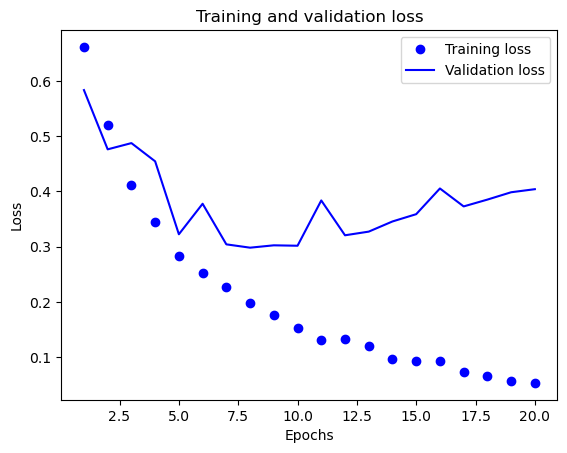

In [32]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

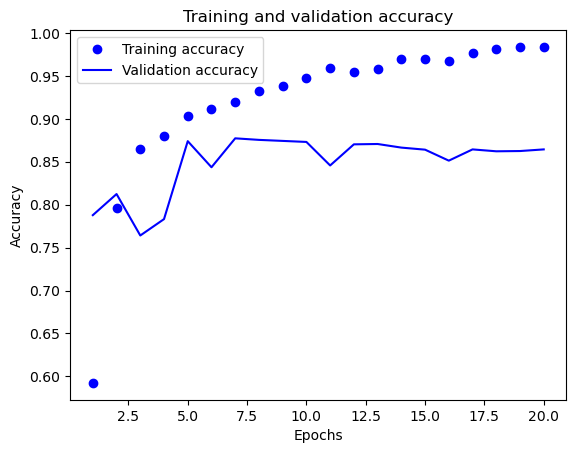

In [33]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [35]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 6ms/step - loss: 0.6346 - accuracy: 0.6894
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.4938 - accuracy: 0.8382
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.3803 - accuracy: 0.8769
Epoch 4/4
782/782 [==============================] - 0s 441us/step - loss: 0.3478 - accuracy: 0.8669


In [37]:
result

[0.34776929020881653, 0.8668799996376038]

In [38]:
model.predict(x_test[:10])

1/1 [==============================] - 0s 35ms/step


array([[0.33344847],
       [0.99174243],
       [0.8381828 ],
       [0.27402213],
       [0.64085364],
       [0.59447783],
       [0.932552  ],
       [0.13553077],
       [0.8946934 ],
       [0.8830415 ]], dtype=float32)